# Refinery Margins Demo - Python Trelliscope

This notebook replicates the R example from `trelliscope.R` using the refinery margins dataset.

**Data**: `_data/refinery_margins.csv`

**R Example**: Line plots of refinery capacity over time, faceted by country

## What We'll Create

- ✅ Time series plots (line + points) for each country
- ✅ One panel per country (10 total panels)
- ✅ Interactive filtering by country
- ✅ Sortable by refinery capacity

In [1]:
import sys
from pathlib import Path

# Add parent directory to path for imports
sys.path.insert(0, str(Path.cwd().parent))

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from trelliscope import Display
from trelliscope.meta import FactorMeta, NumberMeta

print("✓ Imports successful")

✓ Imports successful


## 1. Load and Explore Data

In [2]:
# Load refinery margins data
data_path = Path("../_data/refinery_margins.csv")

print(f"Loading data from: {data_path.absolute()}")
df = pd.read_csv(data_path)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

print(f"\n✓ Loaded {len(df):,} rows")
print(f"\nData shape: {df.shape}")
print(f"\nColumns: {', '.join(df.columns.tolist())}")
print(f"\nCountries ({df['country'].nunique()}): {', '.join(sorted(df['country'].unique()))}")
print(f"\nDate range: {df['date'].min().date()} to {df['date'].max().date()}")

Loading data from: /Users/matthewdeane/Documents/Data Science/python/_projects/py-trelliscope2/examples/../_data/refinery_margins.csv

✓ Loaded 1,920 rows

Data shape: (1920, 20)

Columns: date, country, refinery_kbd, brent, dubai, wti, brent_cracking_nw_europe, brent_hydroskimming_nw_europe, urals_cracking_nw_europe, urals_hydroskimming_nw_europe, es_sider_cracking_med, es_sider_hydroskimming_med, urals_cracking_med, urals_hydroskimming_med, dubai_cracking_singapore, dubai_hydroskimming_singapore, tapis_hydroskimming_singapore, x50_50_hls_lls_cracking_usgc, x30_70_wcs_bakken_cracking_usmc, bakken_coking_usmc

Countries (10): Algeria, Denmark, Germany, Italy, Netherlands, Norway, Romania, Russian Federation, Turkey, United Kingdom

Date range: 2006-01-01 to 2021-12-01


In [3]:
# Preview the data
print("\nFirst few rows:")
df[['date', 'country', 'refinery_kbd', 'brent', 'wti']].head(10)


First few rows:


,date,country,refinery_kbd,brent,wti
0,2006-01-01,Algeria,450.0000,63.57,65.48
1,2006-01-01,Denmark,172.9948,63.57,65.48
2,2006-01-01,Germany,2270.5419,63.57,65.48
3,2006-01-01,Italy,1859.7058,63.57,65.48
4,2006-01-01,Netherlands,907.5555,63.57,65.48
5,2006-01-01,Norway,316.9961,63.57,65.48
6,2006-01-01,Romania,330.4621,63.57,65.48
7,2006-01-01,Russian Federation,4319.2710,63.57,65.48
8,2006-01-01,Turkey,437.9177,63.57,65.48
9,2006-01-01,United Kingdom,1608.6955,63.57,65.48


## 2. Create Plot Function

This function creates a time series plot for each country, matching the R example.

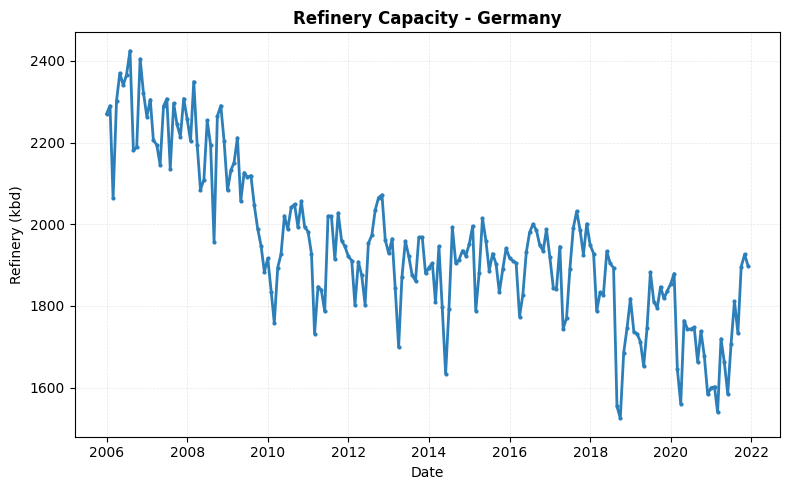

✓ Plot function works! Created test plot for Germany


In [4]:
def create_refinery_plot(country_data, country_name):
    """
    Create time series plot of refinery capacity for a country.
    
    Matches R example:
    - Line plot with points
    - Date on x-axis, refinery_kbd on y-axis
    - Title shows country name
    """
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot line and points (like R example: geom_line() + geom_point())
    ax.plot(country_data['date'], country_data['refinery_kbd'], 
            color='#2c7fb8', linewidth=2, marker='o', markersize=3, 
            markerfacecolor='#2c7fb8', markeredgewidth=0)
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    
    # Labels
    ax.set_title(f"Refinery Capacity - {country_name}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Date", fontsize=10)
    ax.set_ylabel("Refinery (kbd)", fontsize=10)
    
    # Grid
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    
    # Tight layout
    plt.tight_layout()
    
    return fig

# Test the function with one country
test_country = 'Germany'
test_data = df[df['country'] == test_country].copy()
test_fig = create_refinery_plot(test_data, test_country)
plt.show()
plt.close(test_fig)

print(f"✓ Plot function works! Created test plot for {test_country}")

## 3. Prepare Data for Trelliscope

We need one row per country (panel) with summary statistics.

Creating plots for 10 countries...
Countries: Algeria, Denmark, Germany, Italy, Netherlands, Norway, Romania, Russian Federation, Turkey, United Kingdom
  ✓ Algeria: avg=497.7 kbd, max=666.0 kbd
  ✓ Denmark: avg=152.2 kbd, max=181.1 kbd
  ✓ Germany: avg=1947.0 kbd, max=2425.0 kbd
  ✓ Italy: avg=1463.6 kbd, max=1982.8 kbd
  ✓ Netherlands: avg=1029.4 kbd, max=1222.5 kbd
  ✓ Norway: avg=290.8 kbd, max=359.5 kbd
  ✓ Romania: avg=226.1 kbd, max=335.0 kbd
  ✓ Russian Federation: avg=5367.6 kbd, max=6145.8 kbd
  ✓ Turkey: avg=502.0 kbd, max=773.2 kbd
  ✓ United Kingdom: avg=1255.2 kbd, max=1676.3 kbd

✓ Created 10 panels


,country,avg_capacity,max_capacity,n_obs
0,Algeria,497.734375,666.0000,192
1,Denmark,152.194741,181.0975,192
2,Germany,1947.029002,2424.9677,192
3,Italy,1463.561173,1982.7840,192
4,Netherlands,1029.409392,1222.4652,192


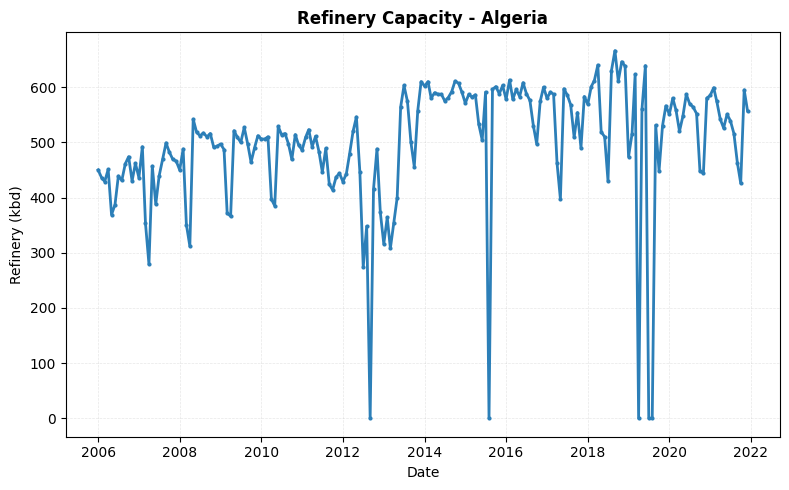

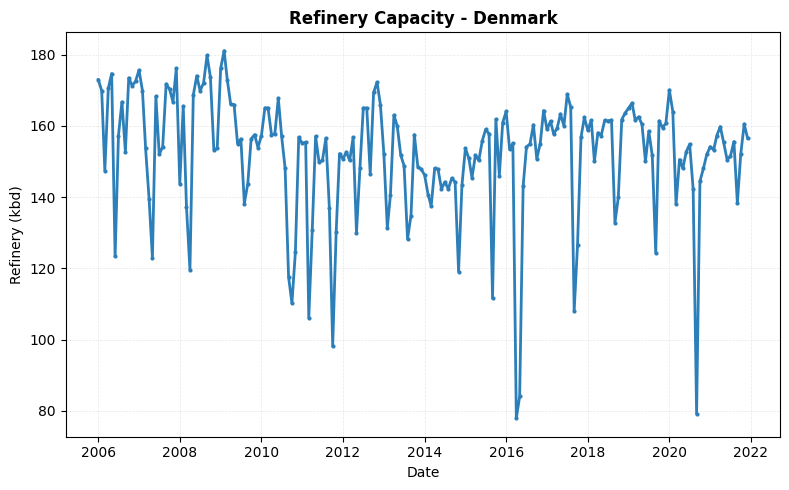

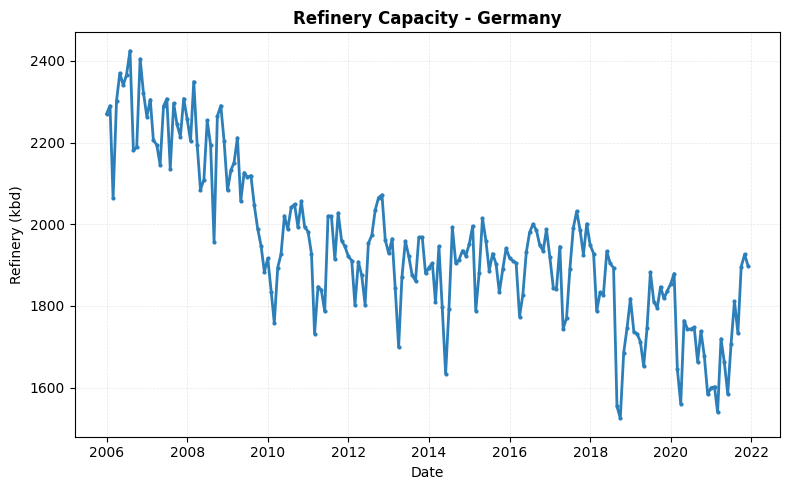

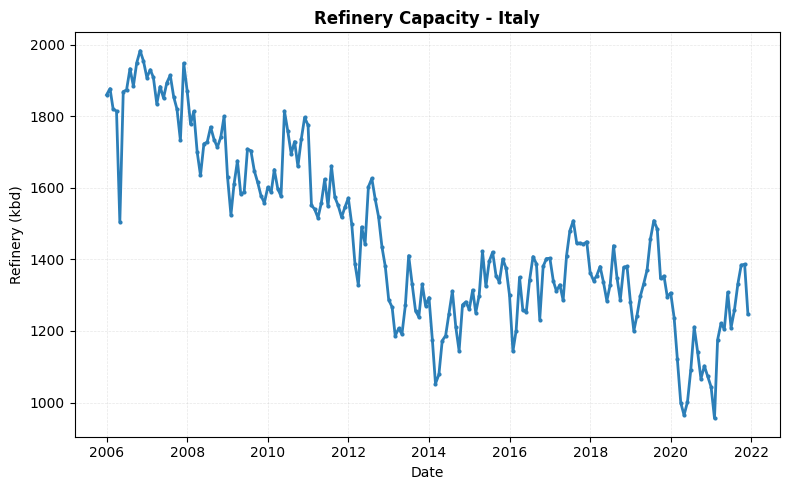

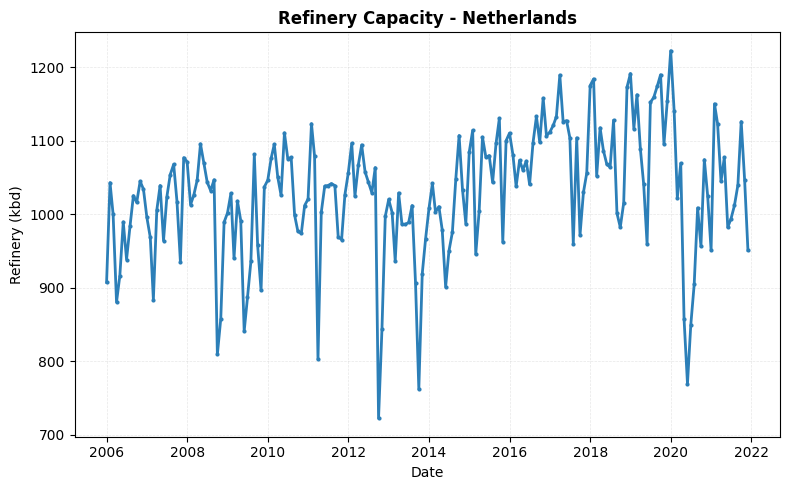

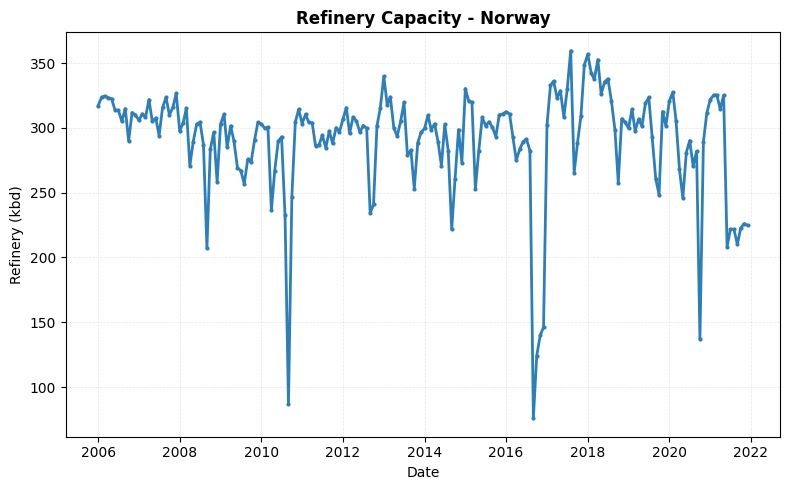

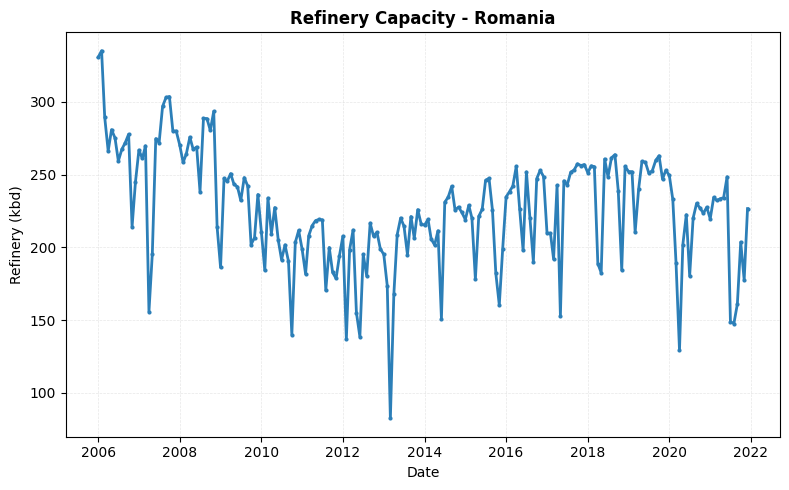

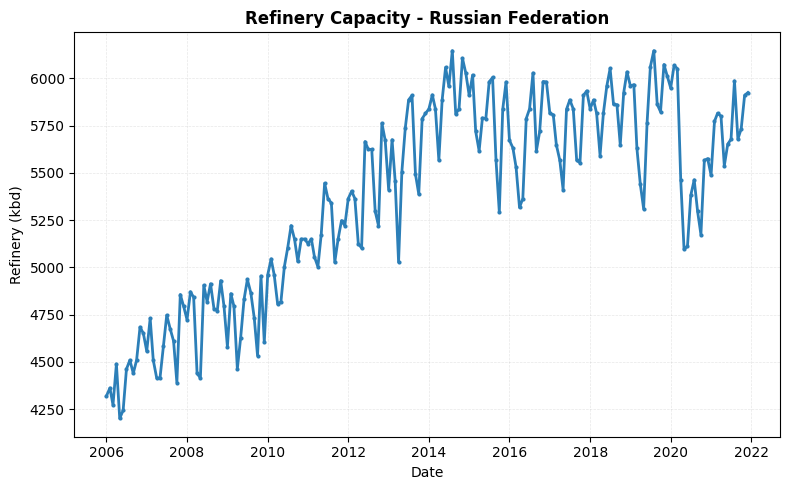

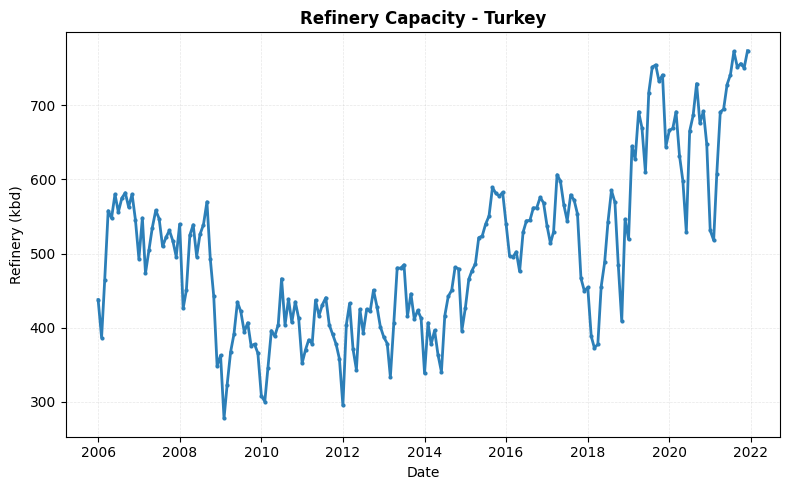

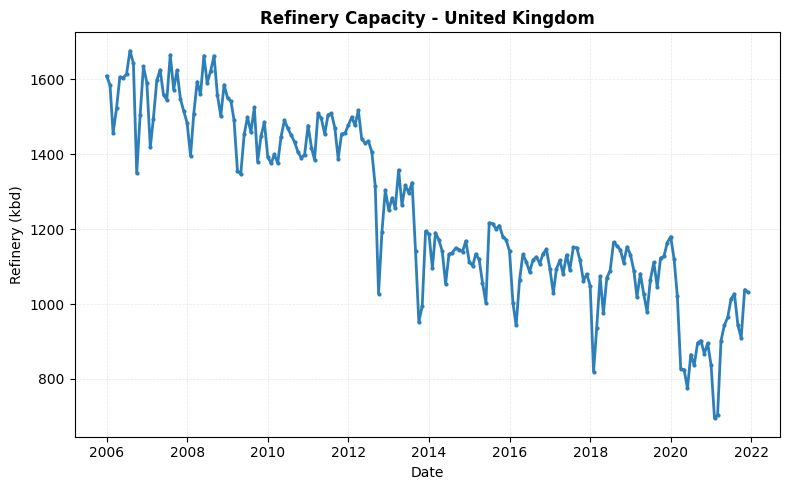

In [5]:
# Get unique countries and create plots
countries = sorted(df['country'].unique())

print(f"Creating plots for {len(countries)} countries...")
print(f"Countries: {', '.join(countries)}")

# Create summary data with one row per country
display_data = []

for country in countries:
    country_df = df[df['country'] == country].copy()
    
    # Calculate summary statistics
    avg_capacity = country_df['refinery_kbd'].mean()
    max_capacity = country_df['refinery_kbd'].max()
    min_capacity = country_df['refinery_kbd'].min()
    n_observations = len(country_df)
    
    # Create plot
    fig = create_refinery_plot(country_df, country)
    
    # Add to display data
    display_data.append({
        'country': country,
        'avg_capacity': avg_capacity,
        'max_capacity': max_capacity,
        'min_capacity': min_capacity,
        'n_obs': n_observations,
        'panel': fig
    })
    
    print(f"  ✓ {country}: avg={avg_capacity:.1f} kbd, max={max_capacity:.1f} kbd")

# Convert to DataFrame
display_df = pd.DataFrame(display_data)

print(f"\n✓ Created {len(display_df)} panels")
display_df[['country', 'avg_capacity', 'max_capacity', 'n_obs']].head()

## 4. Create Trelliscope Display

Using the exact working pattern from our previous examples.

In [6]:
print("Creating Trelliscope display...")
print("="*70)

# Create display - EXACT pattern from working examples
display = Display(
    display_df, 
    name="refinery_by_country",
    description="Refinery Capacity by Country - Time Series"
)

# Set panel column
display.set_panel_column("panel")

# Add explicit meta variables
display.add_meta_variable(
    FactorMeta(
        varname="country", 
        label="Country",
        levels=sorted(countries)
    )
)

display.add_meta_variable(
    NumberMeta(
        varname="avg_capacity",
        label="Avg Capacity (kbd)",
        digits=1
    )
)

display.add_meta_variable(
    NumberMeta(
        varname="max_capacity",
        label="Max Capacity (kbd)",
        digits=1
    )
)

display.add_meta_variable(
    NumberMeta(
        varname="min_capacity",
        label="Min Capacity (kbd)",
        digits=1
    )
)

display.add_meta_variable(
    NumberMeta(
        varname="n_obs",
        label="# Observations",
        digits=0
    )
)

# Set default layout (like R example: nrow=2, ncol=3)
display.set_default_layout(ncol=3, nrow=2, arrangement="row")

# Set default labels
display.set_default_labels(["country", "avg_capacity"])

print(f"✓ Display created: {display.name}")
print(f"  Panel column: {display.panel_column}")
print(f"  Meta variables: {display.list_meta_variables()}")
print(f"  Default layout: 3 columns x 2 rows")

Creating Trelliscope display...
✓ Display created: refinery_by_country
  Panel column: panel
  Meta variables: ['avg_capacity', 'country', 'max_capacity', 'min_capacity', 'n_obs']
  Default layout: 3 columns x 2 rows


## 5. Write Display to Disk

In [7]:
output_dir = Path("output/refinery_by_country")

print(f"Writing display to {output_dir}...")
print("-"*70)

display.write(output_path=output_dir, force=True, viewer_debug=False)

print(f"\n✓ Display written to: {output_dir.absolute()}")

# Close matplotlib figures
plt.close('all')

print("✓ All figures closed")

Writing display to output/refinery_by_country...
----------------------------------------------------------------------
Rendering 10 panels...
  Rendered panel 0: 0.png
  Rendered panel 1: 1.png
  Rendered panel 2: 2.png
  Rendered panel 3: 3.png
  Rendered panel 4: 4.png
  Rendered panel 5: 5.png
  Rendered panel 6: 6.png
  Rendered panel 7: 7.png
  Rendered panel 8: 8.png
  Rendered panel 9: 9.png
  Generated index.html viewer at output/refinery_by_country

✓ Display written to: /Users/matthewdeane/Documents/Data Science/python/_projects/py-trelliscope2/examples/output/refinery_by_country
✓ All figures closed


## 6. Verify Generated Files

In [8]:
print("\nVerifying files...")
print("-"*70)

# Root files
root_files = [
    output_dir / "index.html",
    output_dir / "config.json",
]

# Display directory files
display_dir = output_dir / "displays" / "refinery_by_country"
display_files = [
    output_dir / "displays" / "displayList.json",
    display_dir / "displayInfo.json",
    display_dir / "metaData.json",
    display_dir / "metaData.js",
    display_dir / "metadata.csv",
]

required_files = root_files + display_files

all_exist = True
for file_path in required_files:
    exists = file_path.exists()
    status = "✓" if exists else "✗"
    try:
        rel_path = file_path.relative_to(output_dir)
    except ValueError:
        rel_path = file_path
    print(f"  {status} {rel_path}")
    if not exists:
        all_exist = False

# Check panels
panels_dir = display_dir / "panels"
panel_count = len(list(panels_dir.glob("*.png"))) if panels_dir.exists() else 0
print(f"  ✓ {panel_count} panels in displays/refinery_by_country/panels/")

if all_exist:
    print("\n✅ All required files created successfully!")
else:
    print("\n✗ Some files are missing!")


Verifying files...
----------------------------------------------------------------------
  ✓ index.html
  ✓ config.json
  ✓ displays/displayList.json
  ✓ displays/refinery_by_country/displayInfo.json
  ✓ displays/refinery_by_country/metaData.json
  ✓ displays/refinery_by_country/metaData.js
  ✓ displays/refinery_by_country/metadata.csv
  ✓ 10 panels in displays/refinery_by_country/panels/

✅ All required files created successfully!


## 7. Launch Viewer

Two options to view the display.

### Option 1: Manual Server (Recommended)

Open a terminal and run:
```bash
cd examples/output/refinery_by_country
python3 -m http.server 8763
```

Then open: http://localhost:8763/

### Option 2: Use Display.view() (Programmatic)

Run the cell below to launch the viewer automatically.

In [ ]:
# Launch viewer using Display.view() method
url = display.view(port=8763, open_browser=True)

print(f"\n{'='*70}")
print(f"🌐 VIEWER URL: {url}")
print(f"{'='*70}")
print(f"\nExpected Result:")
print(f"  ✓ {len(countries)} panels displayed (one per country)")
print(f"  ✓ Time series plots showing refinery capacity")
print(f"  ✓ Default layout: 3 columns x 2 rows")
print(f"  ✓ Can filter by country dropdown")
print(f"  ✓ Can sort by avg/max/min capacity")
print(f"  ✓ Labels show country and avg capacity")
print(f"\nServer running in background.")
print(f"To stop: Restart kernel or use Kernel → Interrupt")

Display available at: http://localhost:8763/index.html
Server running in background
Note: Server will stop when Python exits

🌐 VIEWER URL: http://localhost:8763/index.html

Expected Result:
  ✓ 10 panels displayed (one per country)
  ✓ Time series plots showing refinery capacity
  ✓ Default layout: 3 columns x 2 rows
  ✓ Can filter by country dropdown
  ✓ Can sort by avg/max/min capacity
  ✓ Labels show country and avg capacity

Server running in background.
To stop: Restart kernel or use Kernel → Interrupt


127.0.0.1 - - [04/Nov/2025 07:38:52] "GET /index.html HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2025 07:38:52] code 404, message File not found
127.0.0.1 - - [04/Nov/2025 07:38:52] "GET /manifest.json HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2025 07:38:52] code 404, message File not found
127.0.0.1 - - [04/Nov/2025 07:38:52] "GET /src/index.tsx HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2025 07:38:52] code 404, message File not found
127.0.0.1 - - [04/Nov/2025 07:38:52] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2025 07:38:57] "GET /index.html HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2025 07:38:57] code 404, message File not found
127.0.0.1 - - [04/Nov/2025 07:38:57] "GET /manifest.json HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2025 07:38:57] code 404, message File not found
127.0.0.1 - - [04/Nov/2025 07:38:57] "GET /src/index.tsx HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2025 07:40:26] "GET /config.json HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2025 07:40:27] "GET /displays/displayList.json HTTP/1.

: 

## 8. Compare with R Example

This Python implementation replicates the R example from `trelliscope.R`:

### R Code
```r
data %>%
  ggplot(aes(x = date, y = refinery_kbd)) +
  geom_line() +
  geom_point() +
  labs(
    title = "Refinery Capacity",
    y = "Refinery (kbd)"
  ) +
  facet_trelliscope(
    ~ country,
    name = "refinery_by_country",
    nrow = 2,
    ncol = 3
  )
```

### Python Equivalent
```python
# 1. Create plot for each country
for country in countries:
    country_df = df[df['country'] == country]
    fig = create_refinery_plot(country_df, country)

# 2. Create display with facets
display = Display(display_df, name="refinery_by_country")
display.set_panel_column("panel")
display.set_default_layout(ncol=3, nrow=2)
```

### Key Differences

| Aspect | R | Python |
|--------|---|--------|
| **Faceting** | Automatic via `facet_trelliscope()` | Manual: create plot per country |
| **Plot library** | ggplot2 | matplotlib |
| **Meta variables** | Automatic inference | Explicit FactorMeta/NumberMeta |
| **Viewer** | Built-in R widget | Separate HTTP server |

### Similarities

✅ Same data structure
✅ Same visualization (line + points)
✅ Same layout (3 cols x 2 rows)
✅ Same interactive features (filter, sort)
✅ Same output format (displayInfo.json + panels)

## Summary

This notebook demonstrated:

1. ✅ **Loaded refinery margins data** (1,920 rows, 10 countries)
2. ✅ **Created time series plots** for each country
3. ✅ **Used explicit meta variables** for better control
4. ✅ **Set layout matching R example** (3 cols x 2 rows)
5. ✅ **Generated working viewer** with all features

### Your viewer at http://localhost:8763/ should show:

- 🌐 **10 panels** (one per country)
- 📊 **Time series plots** with line + points
- 🔍 **Filter by country** dropdown
- ⬆️ **Sort by capacity** (avg, max, min)
- 🏷️ **Labels** showing country and avg capacity

### Next Steps

Want to modify this example? Try:

- Change plot style (colors, markers)
- Add more meta variables (e.g., price margins)
- Change layout (4x3, 5x2, etc.)
- Filter data by date range
- Create plots for different metrics (brent, wti, etc.)